In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [557]:
data=pd.read_csv('AB_NYC_2019.csv')

In [558]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [560]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [561]:
data.isnull().sum()
data=data.fillna(0)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [562]:
num_col=data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_col)

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [563]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [564]:
data['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

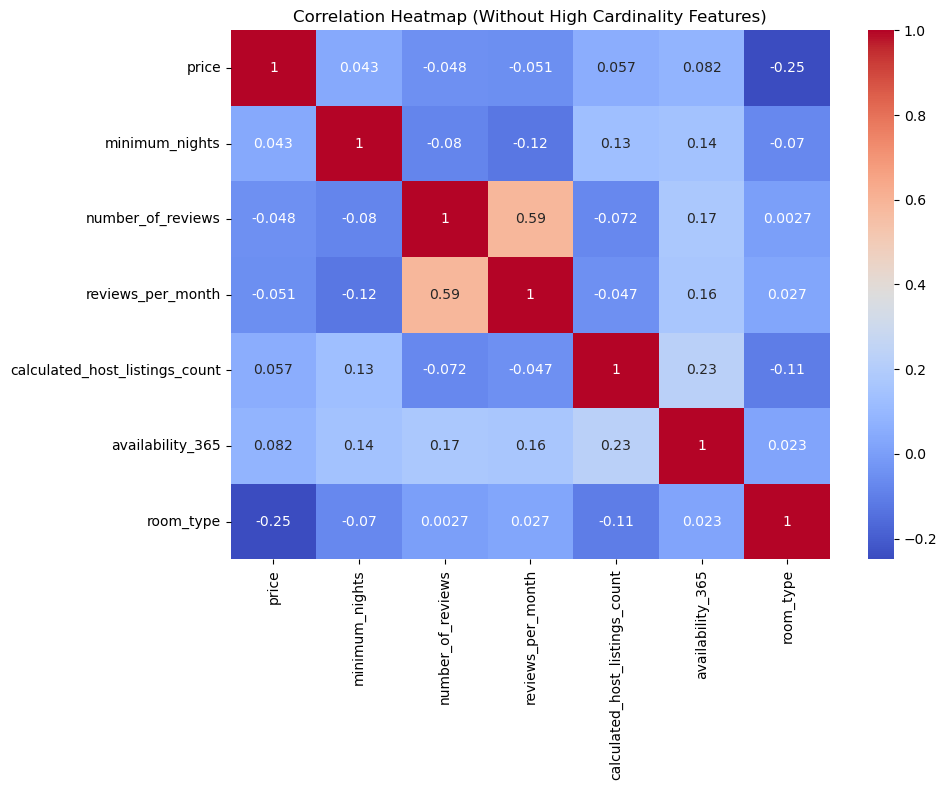

In [565]:
features = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'room_type'
]
conditions = [
    data['room_type'] == 'Entire home/apt',
    data['room_type'] == 'Private room',
    data['room_type'] =='Shared room'
]

choices = [0, 1,2]

data['room_type'] = np.select(conditions, choices, default=3)
data['room_type'] = data['room_type'].astype(int)
data['room_type']=data['room_type'].astype(int)
subset_data = data[features]  

corr_matrix = subset_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Without High Cardinality Features)")
plt.tight_layout()
plt.show()


In [566]:
skewness=subset_data.skew()
print(skewness)

price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.300723
calculated_host_listings_count     7.933174
availability_365                   0.763408
room_type                          0.422704
dtype: float64


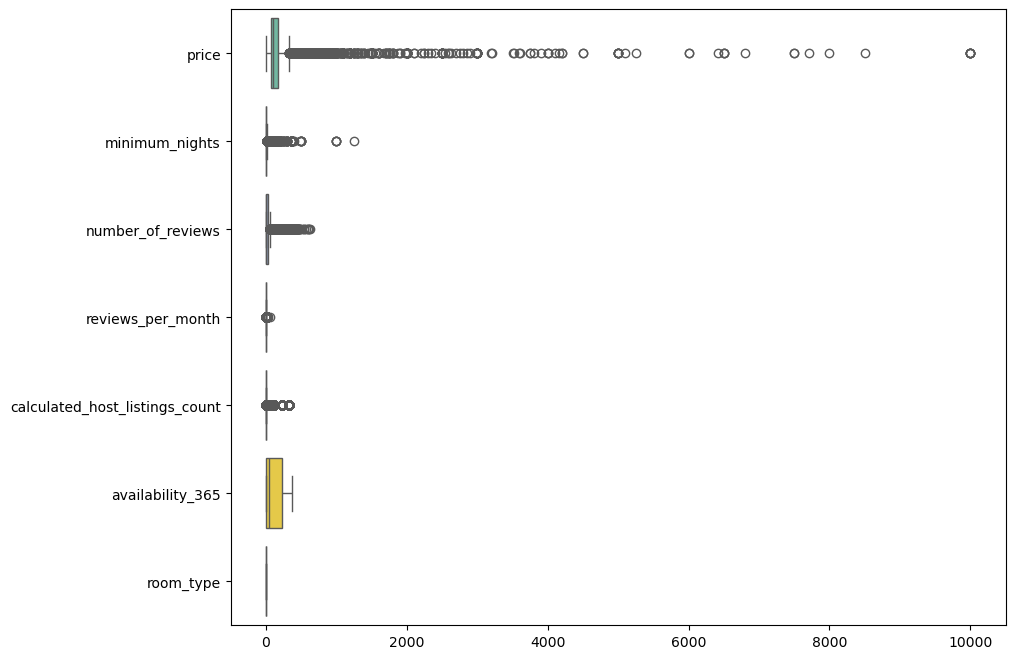

In [567]:
plt.figure(figsize=(10,8))
sns.boxplot(subset_data,orient='h',palette='Set2')
plt.show()

In [568]:
data.shape

(48895, 16)

In [569]:
subset_data.shape

(48895, 7)

In [570]:
outliers=[]
outliers_count={}
for col in subset_data.columns:
    q1=subset_data[col].quantile(0.25)
    q3=subset_data[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    count=((subset_data[col]<lower)|(subset_data[col]>upper)).sum()
    outliers_count[col] = count
    subset_data = subset_data[(subset_data[col] >= lower) & (subset_data[col] <= upper)]
    if((subset_data[col]<lower)|(subset_data[col]>upper)).any():
        outliers.append(col)
print(f"features with outliers:{outliers}")
print(outliers_count)

features with outliers:[]
{'price': np.int64(2972), 'minimum_nights': np.int64(6185), 'number_of_reviews': np.int64(4536), 'reviews_per_month': np.int64(2851), 'calculated_host_listings_count': np.int64(2739), 'availability_365': np.int64(4073), 'room_type': np.int64(0)}


In [571]:
subset_data.shape

(25539, 7)

In [572]:
(subset_data['room_type']==0).sum()

np.int64(12977)

In [573]:
(subset_data['room_type']==1).sum()

np.int64(12132)

In [574]:
(subset_data['room_type']==2).sum()

np.int64(430)

In [575]:
for col in outliers:
    subset_data[col]=np.log1p(subset_data[col])
    

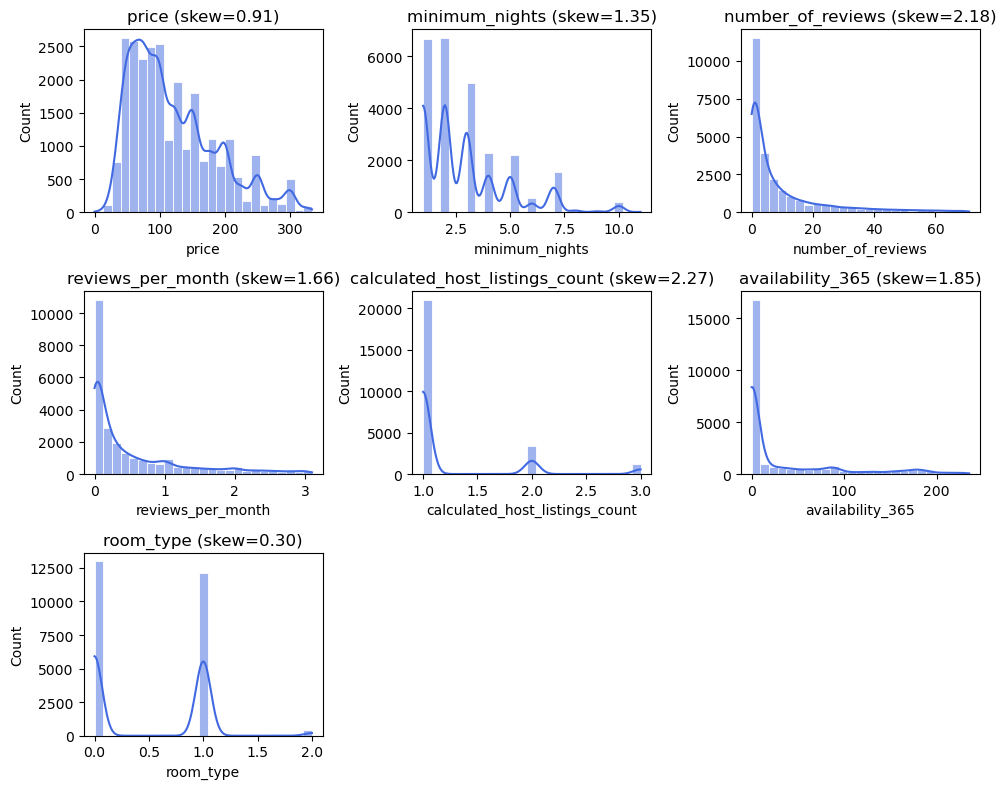

In [576]:
plt.figure(figsize=(10,8))
for i, col in enumerate(features,1):
    plt.subplot(3,3,i)
    sns.histplot(subset_data[col],kde=True,bins=25,color='royalblue',edgecolor='white')
    plt.title(f"{col} (skew={subset_data[col].skew():.2f})")
plt.tight_layout()
plt.show()

In [577]:
x=subset_data.drop('room_type',axis=1)
y=subset_data['room_type']

In [578]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [579]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
X_scaled_train=scalar.fit_transform(x_train)
X_scaled_test=scalar.fit_transform(x_test)
print(X_scaled_train)


[[-0.68421207 -0.97874798 -0.59324538 -0.70815725  1.52358857 -0.55779665]
 [-0.91123234  0.02455341 -0.66466442 -0.73550581 -0.43061057 -0.55779665]
 [ 0.90492986 -0.47709729 -0.30756923 -0.0791403  -0.43061057 -0.27676152]
 ...
 [-0.68421207  0.5262041   0.33520212 -0.42099734  3.47778772 -0.55779665]
 [ 0.07252219 -0.97874798 -0.59324538 -0.6671344  -0.43061057 -0.55779665]
 [ 0.45088931 -0.47709729 -0.66466442 -0.73550581 -0.43061057 -0.55779665]]


In [580]:
from sklearn.decomposition import PCA

In [581]:
pca_full = PCA()
pca_full.fit(X_scaled_train)

PCA()

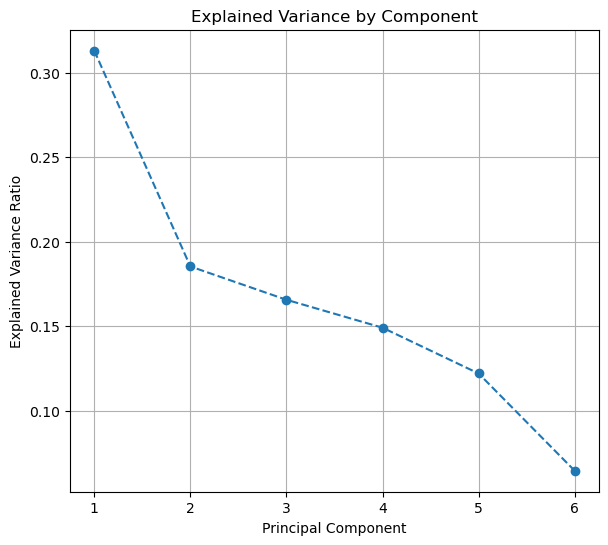

In [582]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 
         marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

In [583]:
n_components = 3
pca_two = PCA(n_components=n_components)
X_train_pca_two = pca_two.fit_transform(X_scaled_train)
df_pca_two = pd.DataFrame(X_train_pca_two, columns=[f'PC_{i+1}' for i in range(n_components)])
print(df_pca_two.columns.tolist())

['PC_1', 'PC_2', 'PC_3']


In [584]:
df_pca_two

,PC_1,PC_2,PC_3
0,-0.472651,-1.848473,0.134687
1,-1.189160,-0.703246,-0.002901
2,-0.425849,0.577236,-0.757043
3,-1.060930,-1.436698,-0.703099
4,0.162318,-0.711755,-1.114244
...,...,...,...
20426,-0.396989,0.227715,-0.718695
20427,-1.143240,-0.025650,0.254150
20428,0.604633,-1.959447,2.065938
20429,-1.001902,-0.383331,-0.954984


In [585]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_scaled_train) 
X_test_pca=pca.fit_transform(X_scaled_test)
total_var = pca.explained_variance_ratio_.sum() * 100
print(f"Total explained variance {pca.n_components} components: {total_var:.2f}")

Total explained variance 3 components: 66.36


In [586]:
columns = [f'PC_{i+1}' for i in range(n_components)]

variance_ratios = pd.DataFrame(
    [pca.explained_variance_ratio_],
    columns=columns,
    index=['Explained Variance Ratio']
)
print(variance_ratios)

                              PC_1      PC_2      PC_3
Explained Variance Ratio  0.311869  0.187388  0.164361


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_pca ,y_train)

y_pred_rf = model_rf.predict(X_test_pca)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
import pickle

filename='scalar.pkl'
with open(filename,"wb") as f:
    pickle.dump(scalar,f)
filename='random_forest.pkl'
with open(filename,"wb") as f:
    pickle.dump(model_rf,f)
filename='pca.pkl'
with open(filename,"wb") as f:
    pickle.dump(pca,f)